## 1.3 System of ODEs - IVP

**Exercise 1:** Springy Pendulum

A mass $m$ is attached to a spring with spring constant $k$, which is attached to a support point as shown in the figure. The length of the resulting pendulum at any given time is the spring rest length $x_0$ plus the stretch (or compression) $x$, and the angle of the pendulum with respect to the vertical is $\theta$.

![alt text](images/springy-pendulum.png "Springy Pendulum")

The differential equations for this system are given by:
$$\ddot x = ({x_0} + x){\dot \theta ^2} - \frac{k}{m}x + g\cos \theta $$
$$\ddot \theta  =  - \frac{1}{{{x_0} + x}}\left[ {g\sin \theta  + 2\dot x\dot \theta } \right]$$

Let

$x_0 = 1$ spring natural length

$x = 1$ initial spring extension

$\dot {x} = 0$ initial velocity

$\theta = 0.3$ initial angle in radians

$\dot {\theta} = 0$ initial angular velocity

$k = 3.5$ spring constant

$m = 0.2$ mass in $kg$

$g = 9.8$ $m/s^2$

Write a program to plot the positions of the mass $m$ in $x-y$ coordinate over the time interval $0 \le t \le 25\; s$.

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

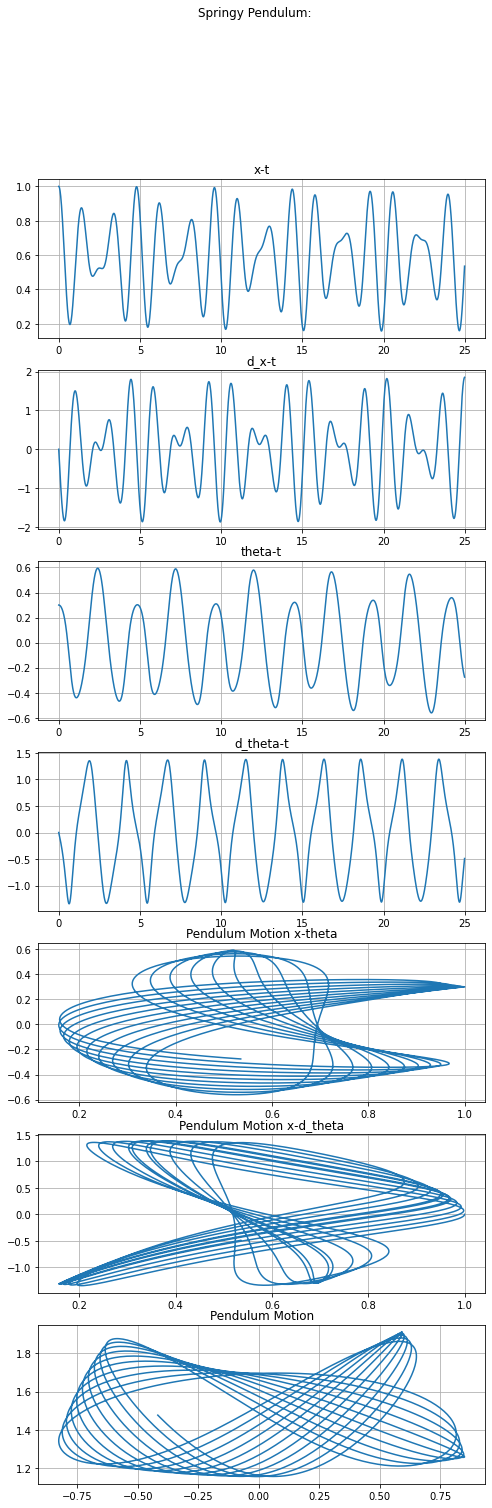

In [2]:
x = 1.
d_x = 0.
theta = 0.3
d_theta = 0.
theta_0 = [x, d_x, theta, d_theta]

x_0 = 1
k = 3.5
m = 0.2
g = 9.8

t = np.arange(0, 25, 0.01)


def func(y, t):  # define vector f(y,t)
    x, d_x, theta, d_theta = y
    dd_x = (x_0 + x) * d_theta**2 - (k * x / m) + g * np.cos(theta)
    dd_theta = -1 * (g * np.sin(theta) + 2 * d_x * d_theta) / (x_0 + x)
    return [d_x, dd_x, d_theta, dd_theta]


vec = odeint(func, theta_0, t)
x = vec[:, 0]
d_x = vec[:, 1]
theta = vec[:, 2]
d_theta = vec[:, 3]

fig, axes = plt.subplots(7, 1, figsize=(8, 24))
fig.suptitle('Springy Pendulum:')

axes[0].plot(t, x)
axes[0].set_title("x-t")
axes[0].grid()

axes[1].plot(t, d_x)
axes[1].set_title("d_x-t")
axes[1].grid()

axes[2].plot(t, theta)
axes[2].set_title("theta-t")
axes[2].grid()

axes[3].plot(t, d_theta)
axes[3].set_title("d_theta-t")
axes[3].grid()

axes[4].plot(x, theta)
axes[4].set_title("Pendulum Motion x-theta")
axes[4].grid()

axes[5].plot(x, d_theta)
axes[5].set_title("Pendulum Motion x-d_theta")
axes[5].grid()

pos_x = (x_0 + x) * np.sin(theta)
pos_y = (x_0 + x) * np.cos(theta)
axes[6].plot(pos_x, pos_y)
axes[6].set_title("Pendulum Motion")
axes[6].grid()
plt.show()